In [ ]:
# load and clean-up data
from numpy import nan
from numpy import isnan
from pandas import read_csv
from pandas import to_numeric

# fill missing values with a value at the same time one day ago
def fill_missing(values):
	one_day = 60 * 24
	for row in range(values.shape[0]):
		for col in range(values.shape[1]):
			if isnan(values[row, col]):
				values[row, col] = values[row - one_day, col]

# load all data
dataset = read_csv('household_power_consumption.txt', sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])
# mark all missing values
dataset.replace('?', nan, inplace=True)
# make dataset numeric
dataset = dataset.astype('float32')
# fill missing
fill_missing(dataset.values)
# add a column for for the remainder of sub metering
values = dataset.values
dataset['sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] + values[:,6])
# save updated dataset
dataset.to_csv('household_power_consumption.csv')

In [1]:
import pandas as pd

student_dict = {'Name': ['Joe', 'Nat', 'Harry'], 'Age': [20, 21, 19], 'Marks': [85.10, 77.80, 91.54]}

# create DataFrame from dict
student_df = pd.DataFrame(student_dict)
print(student_df)

index = pd.Index(['s1', 's2', 's3'])
student_df = student_df.set_index(index)
print(student_df)

    Name  Age  Marks
0    Joe   20  85.10
1    Nat   21  77.80
2  Harry   19  91.54
     Name  Age  Marks
s1    Joe   20  85.10
s2    Nat   21  77.80
s3  Harry   19  91.54


### Test normalisation

In [17]:
import numpy as np
rmse_normalised = 0.5
original_data = np.array([1,2,3,4,5])
mean_original = np.mean(original_data)
std_original = np.std(original_data)
rmse_original = rmse_normalised * std_original
rmse_original += mean_original
print("RMSE in original scale: ", rmse_original)

RMSE in original scale:  3.7071067811865475


In [18]:
data = np.array([[1,2,3],[4,5,6],[7,8,9]])


In [19]:
def normalize_timeseries_data(data):
    # Calculate the mean and standard deviation for each feature
    means = np.mean(data, axis=0)
    stds = np.std(data, axis=0)

    # Normalize each feature using standard deviation
    normalized_data = (data - means) / stds

    return pd.DataFrame(normalized_data), means, stds

def denormalize_timeseries_data(data, means, stds):
    
    denormalized_data = (data * stds) + means
#     denormalized_data = (data - means) / stds
    
    return pd.DataFrame(denormalized_data)

# Example usage
# Assuming you have a 2D array where each row represents a time step and each column represents a feature
time_series_data = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

normalized_data, m, s = normalize_timeseries_data(time_series_data)
print(normalized_data)
denormalized_data = denormalize_timeseries_data(normalized_data, m, s)
print(denormalized_data)

          0         1         2
0 -1.224745 -1.224745 -1.224745
1  0.000000  0.000000  0.000000
2  1.224745  1.224745  1.224745
     0    1    2
0  1.0  2.0  3.0
1  4.0  5.0  6.0
2  7.0  8.0  9.0


In [21]:
def analyze(data):
    return np.std(data, axis=0)

data = np.array([[1,2,3],[4,5,6],[7,8,9]])
norm_data = normalize_timeseries_data(data)


ave = analyze(data)
print(ave)
# print(analyze(norm_data))

[2.44948974 2.44948974 2.44948974]


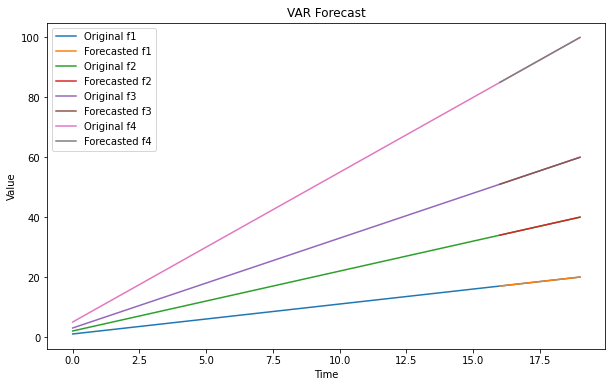

In [24]:
import pandas as pd
import numpy as np
from statsmodels.tsa.vector_ar.var_model import VAR
import matplotlib.pyplot as plt

# Load your multivariate time series data
data = pd.read_csv('test_data.csv')  # Replace 'your_data.csv' with your dataset

# Split the data into training and testing sets
train_size = int(0.8 * len(data))
train_data = data[:train_size]
test_data = data[train_size:]

# Train the VAR model
model = VAR(train_data)
lags = 2  # Choose the number of lag observations to include in the model
model_fit = model.fit(lags)

# Forecast using the trained VAR model
forecast_steps = len(test_data)
# forecast = model_fit.forecast(model_fit.y, steps=forecast_steps)
forecast = model_fit.forecast(train_data.values, steps=forecast_steps)

# Convert the forecasted values to a DataFrame
forecast_df = pd.DataFrame(forecast, index=test_data.index, columns=data.columns)

# Plot the original and forecasted data
plt.figure(figsize=(10, 6))
for column in data.columns:
    plt.plot(data.index, data[column], label='Original ' + column)
    plt.plot(forecast_df.index, forecast_df[column], label='Forecasted ' + column)

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('VAR Forecast')
plt.legend()
plt.show()